In [1]:
import csv
import torch
import numpy as np
import os    

## Imports for plotting
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

# Step 1: Load the CSV into a DataFrame
df_NG = pd.read_csv('Results/CSVs/negative_guidance_pretrained_with_offset.csv')
df_NP = pd.read_csv('Results/CSVs/negative_prompting_pretrained_with_offset.csv')
df_SLD = pd.read_csv('Results/CSVs/safe_latent_diffusion_pretrained_with_offset.csv')

In [2]:
# Step 2.1: Filter the DataFrame based on conditions Logical and go over all guidance scales for NG
df_NP_log  = df_NP[(df_NP['Number of generated samples'] == 10240)]
#df_NG_log  = df_NG[(df_NG['Number of generated samples'] == 10240) & (df_NG['Prior'] == 0.05) & (df_NG['Temp'] == 0.1) & (df_NG['Offset'] == 1e-4)]
df_NG_log  = df_NG[(df_NG['Number of generated samples'] == 10240) & (df_NG['Prior'] == 0.01) & (df_NG['Temp'] == 0.2) & (df_NG['Offset'] == 2e-4)]
df_SLD_log  = df_SLD[(df_SLD['Number of generated samples'] == 10240) & (df_SLD['Threshold'] == 0.04) & (df_SLD['s_s'] == 100.) & (df_SLD['beta_m'] == 0.2)]

#print(df_SLD_log)

In [3]:
NP_num_wrong, NP_KL_div, NP_FID_filt, NP_FID = df_NP_log['Number of forbidden images (%)'], df_NP_log['KL divergence to ground truth'], df_NP_log['FID (without zeros)'], df_NP_log['FID (without zeros)']
NG_num_wrong, NG_KL_div, NG_FID_filt, NG_FID = df_NG_log['Number of forbidden images (%)'], df_NG_log['KL divergence to ground truth'], df_NG_log['FID (without zeros)'], df_NG_log['FID (without zeros)']
SLD_num_wrong, SLD_KL_div, SLD_FID_filt, SLD_FID = df_SLD_log['Number of forbidden images (%)'], df_SLD_log['KL divergence to ground truth'], df_SLD_log['FID (without zeros)'], df_SLD_log['FID (without zeros)']

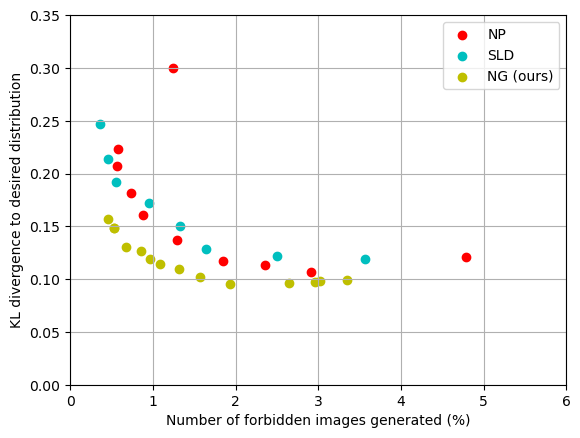

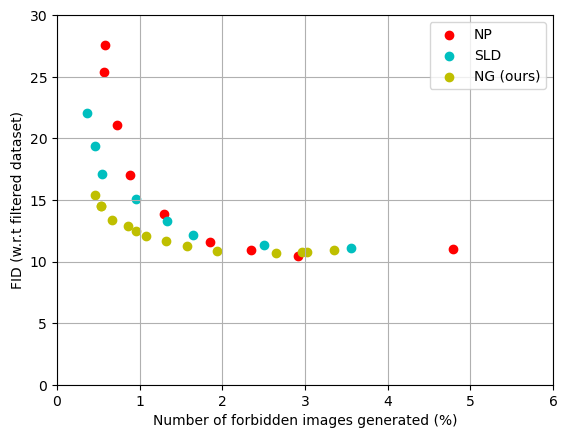

In [4]:
last_k_SLD = 8
plt.figure()
plt.scatter(100*NP_num_wrong, NP_KL_div, c='r', label='NP')
plt.scatter(100*SLD_num_wrong[-last_k_SLD:], SLD_KL_div[-last_k_SLD:], c='c', label='SLD')
plt.scatter(100*NG_num_wrong, NG_KL_div, c='y', label='NG (ours)')
plt.legend()
plt.grid()
plt.xlim(0,6)
plt.ylim(0,0.35)
plt.xlabel('Number of forbidden images generated (%)')
plt.ylabel('KL divergence to desired distribution')
plt.savefig('FirstResults_CIFAR10_KL_div.png')
plt.show()
plt.figure()
plt.scatter(100*NP_num_wrong, NP_FID_filt, c='r', label='NP')
plt.scatter(100*SLD_num_wrong[-last_k_SLD:], SLD_FID_filt[-last_k_SLD:], c='c', label='SLD')
plt.scatter(100*NG_num_wrong, NG_FID_filt, c='y', label='NG (ours)')
plt.legend()
plt.grid()
plt.xlim(0,6)
plt.ylim(0,30.)
plt.xlabel('Number of forbidden images generated (%)')
plt.ylabel('FID (w.r.t filtered dataset)')
plt.savefig('FirstResults_CIFAR10_FID.png')
plt.show()

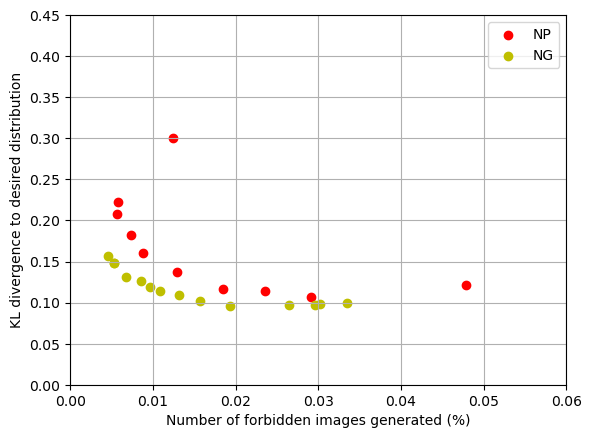

In [5]:
plt.figure()
plt.scatter(NP_num_wrong, NP_KL_div, c='r', label='NP')
plt.scatter(NG_num_wrong, NG_KL_div, c='y', label='NG')
plt.legend()
plt.grid()
plt.xlim(0,0.06)
plt.ylim(0,0.45)
plt.xlabel('Number of forbidden images generated (%)')
plt.ylabel('KL divergence to desired distribution')
plt.show()